# 图像的直方图与二值化
```python
cv2.calcHist(images, # 源图像
             channels, # 通道，灰度图像就是[0]，彩色图像就是 [0],[1],[2]分别对应BGR
             mask, # 掩膜图形，要统计整幅图像就是None，否则要制作一个掩膜图像
             histSize, # BINS(分组)的数目
             ranges, # 像素值范围[0,256]
             hist, 
             accumulate)
```

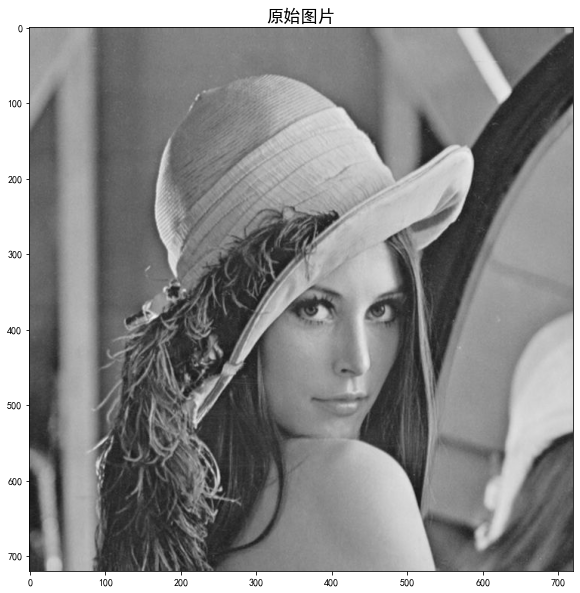

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def imshow(name, img):
    temp = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.title(name, fontsize='xx-large')
    plt.imshow(temp)    # 使用jupyter的时候好像没办法使用cv2.imshow，会卡

origin_image_path = r'C:\Users\ZerosZhang\Documents\PycharmCode\Learn_OpenCV_in_Python\image\Lenna.jpg'
img = cv2.imread(origin_image_path, cv2.IMREAD_GRAYSCALE)
imshow('原始图片', img)

## 绘制计算并绘制直方图
这里实现了两个绘制直方图的函数，一个是使用plt直接绘制，另一种是使用opencv来进行绘制，其中opencv的方式是在一张纯黑的背景上绘制一根根直线做到的，但是存在一个问题，就是还没有正确显示灰度值的数量，目前我们优先使用plt方式

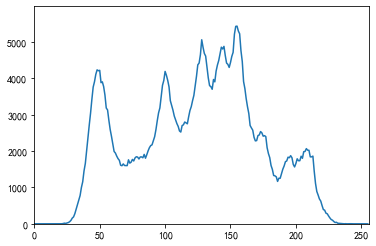

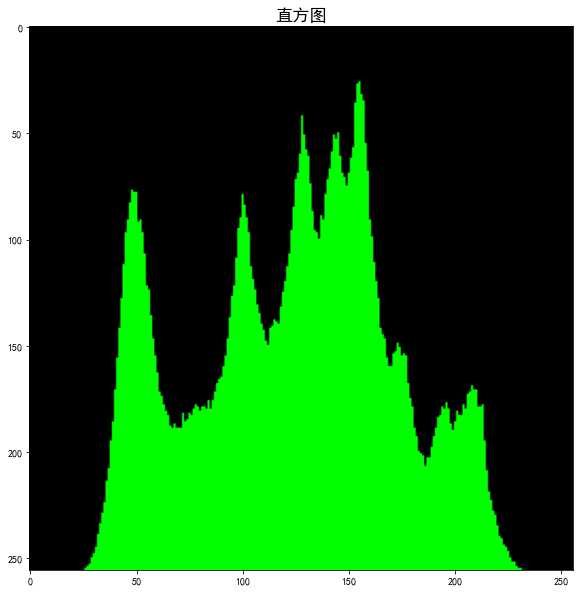

In [10]:
def show_histograme(images, channels=[0], mask=None, histSize=[256], ranges=[0,256]):
    """
    返回图像的直方图，这里使用plt画图
    """
    hist = cv2.calcHist([img], channels, mask, histSize, ranges)
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(hist)
    plt.ylim(0, maxVal*1.1)
    plt.xlim(0,256)
    plt.plot(hist)
    plt.show()
    

def show_histogram_opencv(image, channels=[0], mask=None, histSize=[256], ranges=[0,256], color=[0,255,0]):  
    """
    返回图像的直方图，OpenCV绘制直方图是在不同的位置进行画线绘制出来的
    这里有问题的是还没有正确显示灰度值的数量，后续需要再进行修改
    """
    hist= cv2.calcHist([image], channels, mask, histSize, ranges)  
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(hist)  # 计算最大最小值
    histImg = np.zeros([256,256,3], np.uint8)  
    hpt = int(0.9* 256);  
    for h in range(256):  
        intensity = int(hist[h]*hpt/maxVal)  
        cv2.line(histImg,(h,256), (h,256-intensity), color) 
          
    imshow('直方图', histImg)

show_histograme(img)
show_histogram_opencv(img)

### 使用掩膜

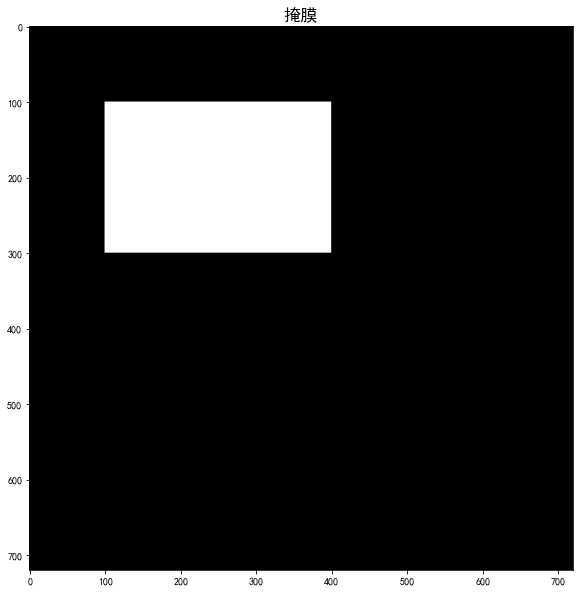

In [11]:
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
imshow('掩膜', mask)

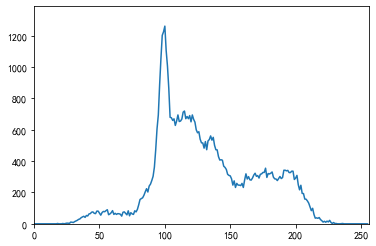

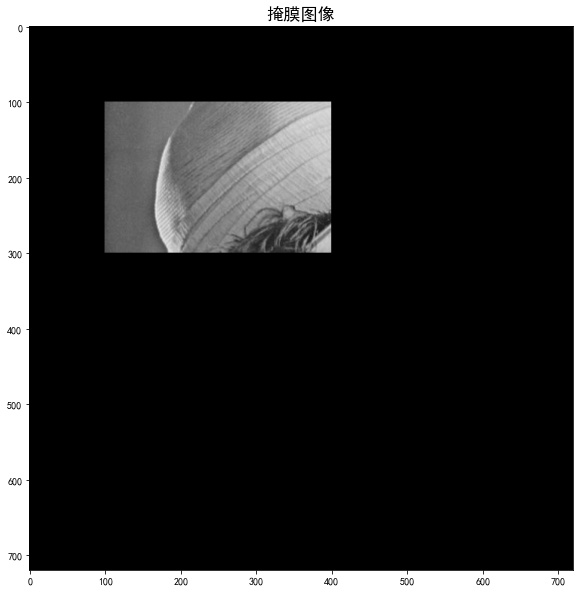

In [17]:
masked_img = cv2.bitwise_and(img, mask)
show_histograme(img, mask=mask)
imshow('掩膜图像', masked_img)

## 图像的二值化
分为三个部分，简单阈值，自适应阈值，与Otsu's二值化

### 简单阈值 cv2.threshold

```python
retval, dst = cv2.threshold(src, # 源图像
                            thresh, # 阈值
                            maxval,  # 主要是THRESH_BINARY，和THRESH_BINARY_INV用
                            type, # 二值化算法
                            dst)

```
函数就是这么个函数，然后对于不同的参数，公式如下

![image-20210508150436467](https://cdn.jsdelivr.net/gh/sheng962464/PicGo/img/20210508150437.png)

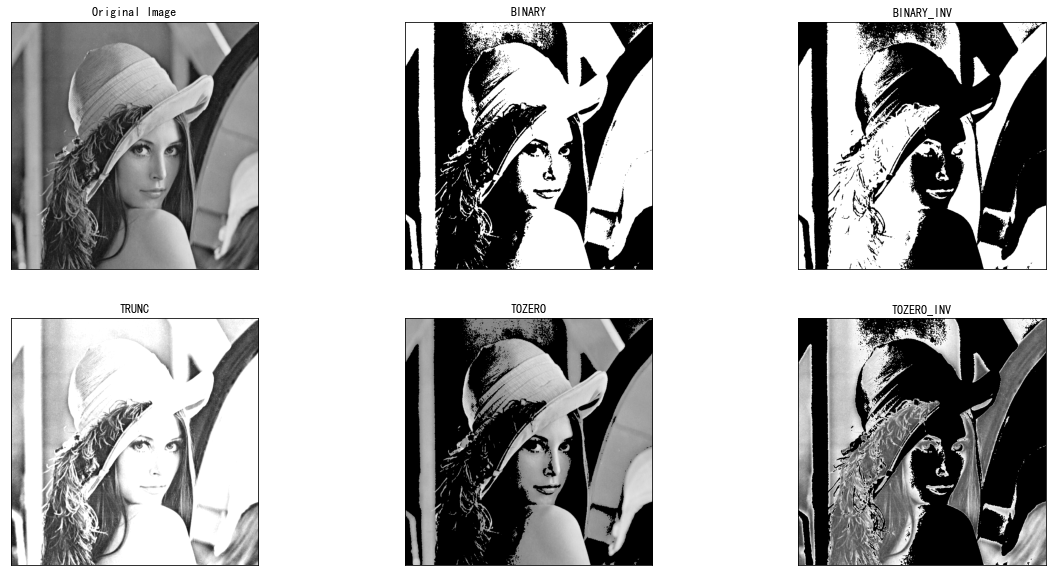

In [18]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### 自适应阈值 cv2.adaptiveThreshold
自适应阈值的主要使用场景为：同一幅图像上的不同部分具有不同的亮度。使用自适应阈值时，不同的区域采用的是不同的阈值，该阈值通过适应算法计算获得
```python
dst = cv.adaptiveThreshold(src, 
                           maxValue, # 最大值
                           adaptiveMethod, # 自适应算法
                           thresholdType, # 阈值算法
                           blockSize, # 邻域范围
                           C, # 常量，阈值的补偿量
                           dst)
```
阈值算法只有如下两种

![image-20210508151127162](https://cdn.jsdelivr.net/gh/sheng962464/PicGo/img/20210508151128.png)

自适应算法包含两个`cv.ADAPTIVE_THRESH_MEAN_C`和`cv.ADAPTIVE_THRESH_GAUSSIAN_C`, 用于计算T(x,y)。前者计算平均数，后者计算高斯加权平均数。

![下载](https://cdn.jsdelivr.net/gh/sheng962464/PicGo/img/20210508151649.jpg)

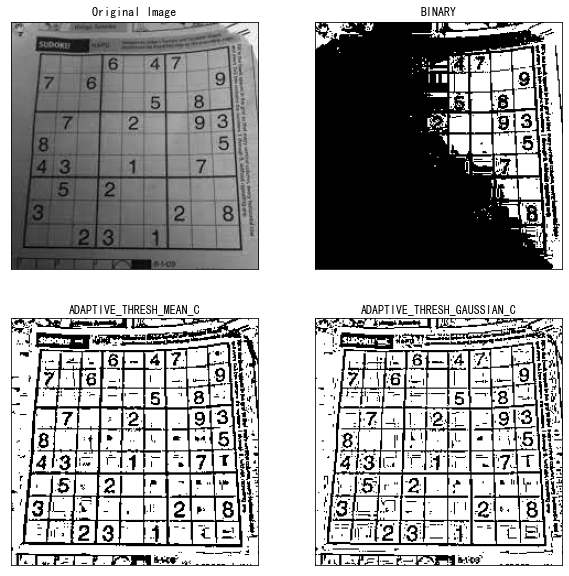

In [20]:
origin_image_path = r'C:\Users\ZerosZhang\Documents\PycharmCode\Learn_OpenCV_in_Python\image\pic_0013.jpg'
img = cv2.imread(origin_image_path, cv2.IMREAD_GRAYSCALE)

ret, thresh1 = cv2.threshold(img, 127,255,cv2.THRESH_BINARY)
thresh2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
thresh3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

plt.figure(figsize=(10,10))
titles = ['Original Image','BINARY','ADAPTIVE_THRESH_MEAN_C','ADAPTIVE_THRESH_GAUSSIAN_C']
images = [img, thresh1, thresh2, thresh3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Otsu's二值化 cv2.THRESH_OTSU
Otsu's二值化我的理解也是自适应阈值，只不他没有区域的概念，而是从直方图中去计算这个阈值。通常该直方图中只有两个主要峰，计算的阈值，在这两个峰之间。

![OpenCV-Python入门教程6-Otsu阈值法- 墨麟非攻- 博客园](https://cdn.jsdelivr.net/gh/sheng962464/PicGo/img/20210508152855.jpeg)

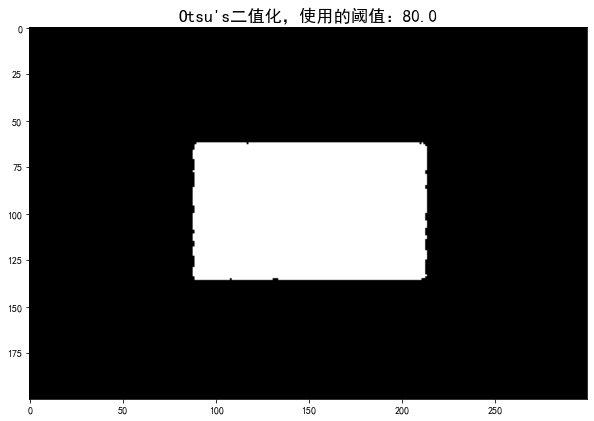

In [8]:
origin_image_path = r'C:/Users/ZerosZhang/Documents/PycharmCode/Learn_OpenCV_in_Python/image/pic_0014.png'
img = cv2.imread(origin_image_path, cv2.IMREAD_GRAYSCALE)
blur = cv2.GaussianBlur(img,(5,5),0)
ret2, th2 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
imshow(f"Otsu's二值化，使用的阈值：{ret2}", th2)